# 🚀 Jaaie | Task 1 – Titanic Dataset Cleaning  
## Elevate Labs AI/ML Internship

## 1. Importing Libraries  



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
sns.set_style("whitegrid")

# Display all columns
pd.set_option('display.max_columns', None)

## 2. Loading and Exploring the Dataset  


In [5]:
df = pd.read_csv("Titanic-Dataset.csv")

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


## 3. Handling Missing Values  


In [10]:
# Fill missing Age values with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing Embarked values with mode (most frequent value)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [11]:
#Check for null values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


## 4. Dropping Irrelevant Columns  


In [12]:
# Drop columns that are not needed
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Checking the new shape and previewing the data
print("Shape after cleaning:", df.shape)
df.head()

Shape after cleaning: (891, 8)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [14]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


## 5. Encoding Categorical Variables  


In [15]:
# Label Encode Sex
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-hot Encode Embarked
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,NaN,22.0,1,0,7.2500,False,True
1,1,1,NaN,38.0,1,0,71.2833,False,False
2,1,3,NaN,26.0,0,0,7.9250,False,True
3,1,1,NaN,35.0,1,0,53.1000,False,True
4,0,3,NaN,35.0,0,0,8.0500,False,True


## 6. Visualizing, Detecting & Removing Outliers  


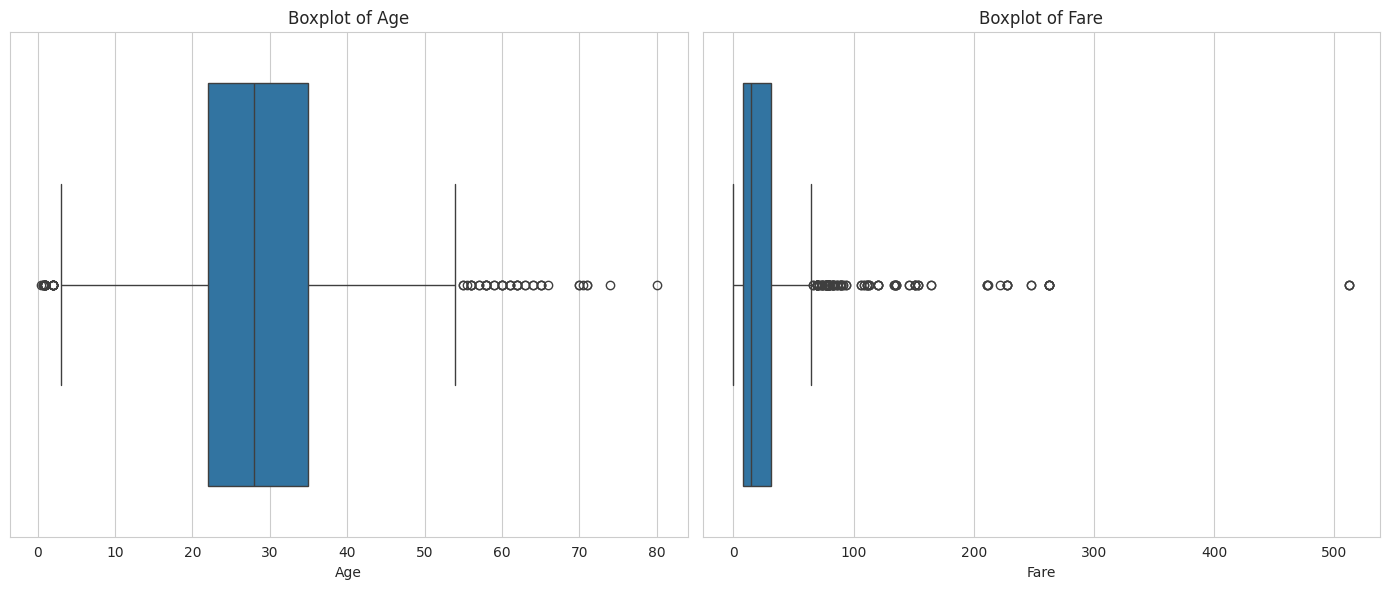

In [16]:
# Visualize Age and Fare outliers
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['Age'])
plt.title("Boxplot of Age")

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Fare'])
plt.title("Boxplot of Fare")

plt.tight_layout()
plt.show()


In [17]:
# Removing outliers using IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

# Apply to Age and Fare
df = remove_outliers_iqr(df, 'Age')
df = remove_outliers_iqr(df, 'Fare')

# Check new shape
print("New shape after removing outliers:", df.shape)


New shape after removing outliers: (718, 9)


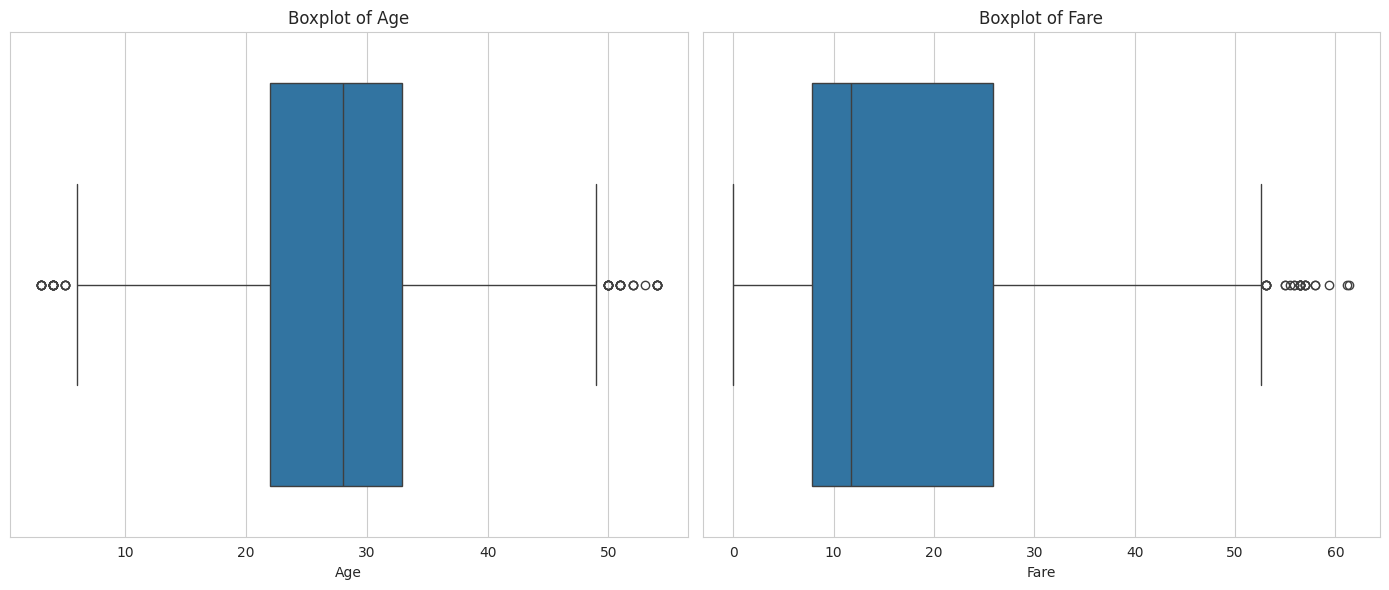

In [18]:
# Visualize Age and Fare outliers
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['Age'])
plt.title("Boxplot of Age")

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Fare'])
plt.title("Boxplot of Fare")

plt.tight_layout()
plt.show()


## 7. Feature Scaling  


In [20]:
from sklearn.preprocessing import StandardScaler

# Select the columns to scale
columns_to_scale = ['Age', 'Fare', 'SibSp', 'Parch']

# Create scaler
scaler = StandardScaler()

# Fit and transform the data
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,NaN,-0.607611,0.686268,-0.40491,-0.751265,False,True
2,1,3,NaN,-0.207827,-0.484137,-0.40491,-0.700265,False,True
3,1,1,NaN,0.691688,0.686268,-0.40491,2.712961,False,True
4,0,3,NaN,0.691688,-0.484137,-0.40491,-0.690821,False,True
5,0,3,NaN,-0.007934,-0.484137,-0.40491,-0.659971,True,False


In [22]:
df['Sex'].unique()


array([nan])

## 8. Re-running the encoding properly since the values in **Sex** column are null


In [24]:
print("Shape before fixing:", df.shape)


Shape before fixing: (718, 9)


In [26]:
# Reload the original CSV to get the correct Sex values
original_df = pd.read_csv("Titanic-Dataset.csv")

# Keep only the rows from the original dataset that match the rows I have right now in my cleaned dataset
original_df = original_df.loc[df.index]

# re-mapping 'Sex'
df['Sex'] = original_df['Sex'].map({'male': 0, 'female': 1})

print("Unique values in fixed 'Sex':", df['Sex'].unique())


Unique values in fixed 'Sex': [0 1]


In [27]:
#Scaling-check
df[['Age', 'Fare', 'SibSp', 'Parch']].describe()

,Age,Fare,SibSp,Parch
count,7.180000e+02,7.180000e+02,7.180000e+02,7.180000e+02
mean,1.979228e-17,-7.422104e-18,-4.948069e-18,2.721438e-17
std,1.000697e+00,1.000697e+00,1.000697e+00,1.000697e+00
min,-2.506587e+00,-1.299043e+00,-4.841367e-01,-4.049101e-01
25%,-6.076110e-01,-7.029415e-01,-4.841367e-01,-4.049101e-01
50%,-7.934439e-03,-4.112647e-01,-4.841367e-01,-4.049101e-01
75%,4.793028e-01,6.599744e-01,6.862678e-01,-4.049101e-01
max,2.590664e+00,3.338501e+00,5.367886e+00,7.245760e+00


## 8. Visual Analysis (Extra Plots)  


While industry projects often use just one or two plots to check for outliers or patterns, I’ve added a few extra visualizations here to apply what I’ve learned in my master’s and to tell a better data story.

These charts helped me understand and communicate the relationships in the data more clearly — something that’s very important in real company projects.


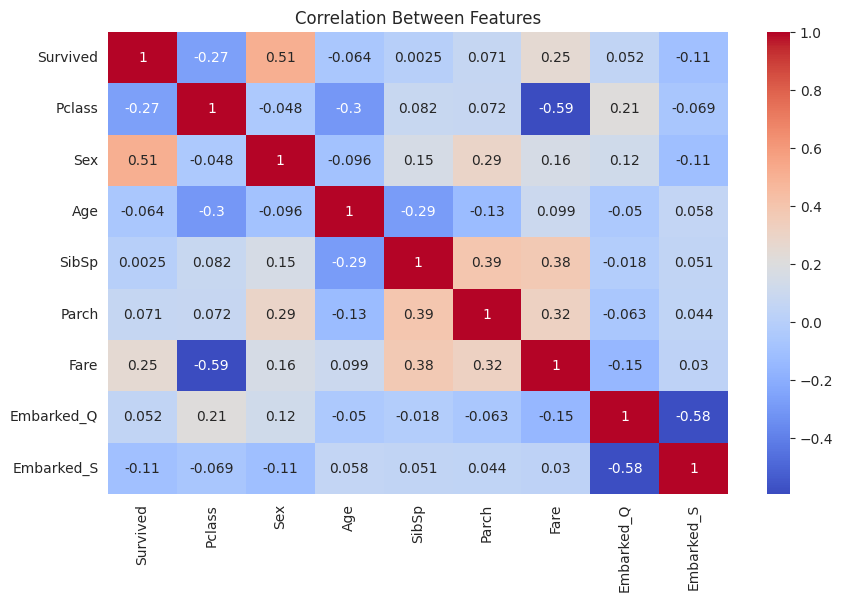

In [28]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Features")
plt.show()


### Correlation Heatmap – Observation
This heatmap shows how features relate to each other.  
- `Sex` has a **strong positive correlation** with `Survived` (0.51), meaning females had higher survival.
- `Pclass` has a **negative correlation** with `Survived` (–0.27), so lower-class passengers had lower survival chances.
- `Fare` also shows some positive correlation with survival.

These insights tell us which features might help in predicting who survived.


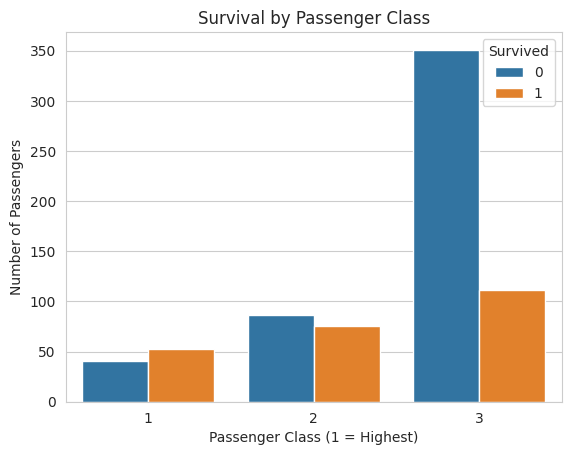

In [29]:
# Survival count by Passenger Class
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title("Survival by Passenger Class")
plt.xlabel("Passenger Class (1 = Highest)")
plt.ylabel("Number of Passengers")
plt.show()


### Survival Count by Class – Observation
This chart shows that 1st class passengers had the highest survival rate.  
As the class goes lower (2nd, 3rd), the survival chances drop.

This proves that passenger class played a big role in survival, likely due to cabin location or priority access to lifeboats.


## 9. Final Dataset Overview


## ✅ Final Summary
- The dataset has been cleaned, encoded, outlier-handled, and scaled.
- It now contains 9 numeric, ML-ready features.
- Extra visualizations helped uncover patterns between class, gender, and survival.
- This notebook follows real-world practices and reflects my learning journey in AI/ML.

